# __Fire Causes__
#### _Bureau of Fire Investigations_
<div>
<img src="https://upload.wikimedia.org/wikipedia/commons/2/25/Emblem_of_the_New_York_City_Fire_Department.svg" width="120"/>
</div>

<hr>

Source: _<a href="https://data.cityofnewyork.us/Public-Safety/Bureau-of-Fire-Investigations-Fire-Causes/ii3r-svjz/about_data">NYC Open Data</a>_ <br>
Last updated: _9 May 2024_ <br>
Accessed: _3 June 2024_

<hr>

### Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

C:\ProgramData\Anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


<hr>

### Exploration

In [36]:
path = 'datasets/001. Bureau of Fire Investigations - Fire Causes/Bureau_of_Fire_Investigations_-_Fire_Causes_20240603.csv'

In [45]:
colnames = ['Year', 'ID', 'Date', 'Borough', 'Fire battalion', 'Community district', 'Police precinct', 'Incident type', 'Fire cause', 'Fire cause category']
coldtypes = {'Year': 'int64', 'ID': 'int64', 'Date': 'str', 'Borough': 'str', 'Fire battalion': 'int64', 'Community district': 'int64', 'Police precinct': 'int64', 'Incident type': 'str', 'Fire cause': 'str', 'Fire cause category': 'str'}

In [49]:
df = pd.read_csv(path, names = colnames, header = 0)#, dtype = coldtypes)#, parse_dates=['Incident_DateTime'])
df.head()

,Year,ID,Date,Borough,Fire battalion,Community district,Police precinct,Incident type,Fire cause,Fire cause category
0,2016,40001,01/01/2016 12:08:00 AM,Queens,50,8,107,MD Residential Structure,Smoking (Cigarette/Cigar),Smoking
1,2016,50001,01/01/2016 12:13:00 AM,Staten Island,21,2,122,PD Residential Structure,Incendiary - Combustible Material,Incendiary
2,2016,40002,01/01/2016 12:21:00 AM,Queens,37,5,104,MD Residential Structure,Incendiary - Combustible Material,Incendiary
3,2016,60001,01/01/2016 12:29:00 AM,Bronx,15,12,47,Burn Notification (Albany),Albany Burn Notif. Unrelated to a Fire/Explosion,Other
4,2016,40003,01/01/2016 12:32:00 AM,Queens,50,12,103,PD Residential Structure,Incendiary - Combustible Material,Incendiary


In [47]:
df.dtypes

Year                    int64
ID                      int32
Date                   object
Borough                object
Fire battalion         object
Community district     object
Police precinct        object
Incident type          object
Fire cause             object
Fire cause category    object
dtype: object

In [172]:
df.isna().sum()

Year                      0
ID                        0
Date                      0
Borough                 260
Fire battalion         7658
Community district      338
Police precinct         344
Incident type           827
Fire cause               73
Fire cause category      61
dtype: int64

In [174]:
df[df['Fire battalion'].isna()]

,Year,ID,Date,Borough,Fire battalion,Community district,Police precinct,Incident type,Fire cause,Fire cause category
144,2016,60016,01/05/2016 07:00:00 PM,Outside of NYC,NaN,Out of NYC,NaN,Burn Notification (Albany),Albany Burn Notif. Unrelated to a Fire/Explosion,Other
385,2016,70016,01/15/2016 10:05:00 PM,Queens,NaN,12,113,Other,Juvenile Firesetter Intervention,Other
523,2016,70075,01/23/2016 12:00:00 AM,Brooklyn,NaN,6,60,Vehicle,Incendiary,Incendiary
631,2016,70042,01/27/2016 09:49:00 PM,Bronx,NaN,2,41,Other,Juvenile Firesetter Intervention,Other
650,2016,70040,01/29/2016 12:00:00 AM,Manhattan,NaN,NaN,24,No Fire,Fraudulent Placard Investigation,No Fire
...,...,...,...,...,...,...,...,...,...,...
53672,2024,77100,04/16/2024 02:08:00 PM,Brooklyn,NaN,2,77,Vehicle,Lithium Ion Battery,Electrical
53693,2024,77106,04/20/2024 01:00:00 AM,Queens,NaN,9,102,PD Residential Structure,Incendiary - Combustible Material,Incendiary
53694,2024,77108,04/20/2024 01:00:00 AM,Queens,NaN,9,102,PD Residential Structure,Incendiary - Combustible Material,Incendiary
53713,2024,20332,04/24/2024 09:08:00 AM,Bronx,NaN,10,45,Vehicle,Preliminary Investigation Only,Other


In [56]:
df['Fire battalion'].unique()

array(['50', '21', '37', '15', '9', '32', '46', '16', '28', '1', '3',
       '20', '57', '49', '10', '14', '58', '43', '48', '39', '44', '6',
       '4', '27', '45', '13', '8', '47', '31', '51', '54', '42', '7',
       '26', '19', '52', '35', '12', '23', '18', '40', '53', '38', '41',
       '11', '22', '33', nan, '17', '2', '55', '0', 'SC', 'BC', 'OP',
       'CD', 'TR', 'MR'], dtype=object)

In [85]:
pivot1 = df.pivot_table(index = 'Fire battalion',
               columns = 'Borough',
               values = 'ID',
               aggfunc = 'count',
               fill_value = 0,
               margins = True, 
               margins_name = 'Total')

pivot1.sort_values(by=['Total'], ascending=False)

Borough,Bronx,Brooklyn,Manhattan,Outside of NYC,Queens,Staten Island,Total
Fire battalion,,,,,,,
Total,10731,13711,8819,2,10316,2396,45975
50,0,2,1,0,1664,0,1667
54,0,5,0,0,1495,0,1500
15,1426,3,3,0,0,0,1432
46,1,0,1,0,1407,1,1410
18,1355,0,0,0,1,0,1356
19,1344,0,5,0,0,0,1349
44,1,1300,0,0,4,0,1305
38,0,1224,1,0,0,1,1226


In [90]:
pivot2 = df.pivot_table(
    index = 'Borough',
    values = 'ID',
    aggfunc = 'count',
    #fill_value = 0,
    margins = True,
    #margins_name = 'Total',
)

pivot2.sort_values(by = 'ID', ascending = False)

,ID
Borough,
All,53481
Brooklyn,15823
Bronx,12268
Queens,12169
Manhattan,10381
Staten Island,2763
Outside of NYC,77


In [97]:
outsideofNYC = df[df['Borough'] == 'Outside of NYC']
outsideofNYC.head(20)

,Year,ID,Date,Borough,Fire battalion,Community district,Police precinct,Incident type,Fire cause,Fire cause category
144,2016,60016,01/05/2016 07:00:00 PM,Outside of NYC,NaN,Out of NYC,NaN,Burn Notification (Albany),Albany Burn Notif. Unrelated to a Fire/Explosion,Other
2025,2016,60203,04/02/2016 07:00:00 PM,Outside of NYC,NaN,Out of NYC,SC01,Burn Notification (Albany),Albany Burn Notif. Unrelated to a Fire/Explosion,Other
2327,2016,60234,04/17/2016 12:01:00 AM,Outside of NYC,NaN,Out of NYC,NaN,Burn Notification (Albany),Albany Burn Notif. Unrelated to a Fire/Explosion,Other
2746,2016,60296,05/06/2016 10:30:00 AM,Outside of NYC,NaN,Out of NYC,NaN,Burn Notification (Albany),Albany Burn Notif. Unrelated to a Fire/Explosion,Other
3401,2016,75001,06/07/2016 10:00:00 AM,Outside of NYC,NaN,Out of NYC,NaN,No Fire,Fireworks Related,No Fire
3422,2016,75002,06/08/2016 10:00:00 AM,Outside of NYC,NaN,Out of NYC,NaN,No Fire,Fireworks Related,No Fire
3436,2016,75003,06/09/2016 10:00:00 AM,Outside of NYC,NaN,Out of NYC,NaN,No Fire,Fireworks Related,No Fire
3518,2016,75004,06/13/2016 10:00:00 AM,Outside of NYC,NaN,12,33,No Fire,Fireworks Related,No Fire
3534,2016,75005,06/14/2016 10:00:00 AM,Outside of NYC,NaN,Out of NYC,NaN,No Fire,Fireworks Related,No Fire
3554,2016,75006,06/15/2016 10:00:00 AM,Outside of NYC,NaN,Out of NYC,NaN,No Fire,Fireworks Related,No Fire


In [109]:
outsideofNYC[outsideofNYC['Borough'] != 'Outside of NYC']

,Year,ID,Date,Borough,Fire battalion,Community district,Police precinct,Incident type,Fire cause,Fire cause category


In [104]:
outsideofNYC['Fire cause category'].unique()

array(['Other', 'No Fire', 'Electrical'], dtype=object)

In [104]:
outsideofNYC['Fire cause category'].unique()

array(['Other', 'No Fire', 'Electrical'], dtype=object)

In [104]:
outsideofNYC['Fire cause category'].unique()

array(['Other', 'No Fire', 'Electrical'], dtype=object)

In [104]:
outsideofNYC['Fire cause category'].unique()

array(['Other', 'No Fire', 'Electrical'], dtype=object)

In [104]:
outsideofNYC['Fire cause category'].unique()

array(['Other', 'No Fire', 'Electrical'], dtype=object)

In [93]:
77/53481*100

0.143976365438193

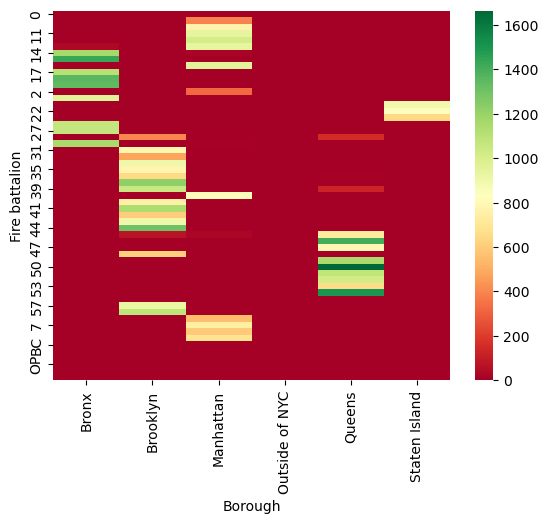

In [74]:
# Heatmap example
sns.heatmap(pivot1, cmap = 'RdYlGn');

In [132]:
pivot3 = df.pivot_table(index = 'Police precinct',
               columns = 'Borough',
               values = 'ID',
               aggfunc = 'count',
               fill_value = 0,
               margins = True, 
               margins_name = 'Total')

pivot3b = pivot3.sort_values(by=['Total'], ascending=False)
pivot3b[pivot3b['Total'] <= 300].index

Index(['SC07', '5th', '2', '0', 'PAPD', 'NJ', '11', '22', 'HY2', '7th', 'MTS',
       'NC05', '12', 'PSA7', 'HWY2', 'PSA2', 'SC01', '21', 'mtn', 'NC08'],
      dtype='object', name='Police precinct')

In [152]:
pivot3b[pivot3b['Total'] <= 400]['Total']#.sum()

Police precinct
112     390
94      387
10      385
5       384
111     369
28      361
78      357
17      356
30      356
26      355
100     352
76      348
20      345
6       317
SC07     40
5th      15
2        13
0        13
PAPD      5
NJ        4
11        4
22        4
HY2       3
7th       3
MTS       2
NC05      2
12        2
PSA7      2
HWY2      1
PSA2      1
SC01      1
21        1
mtn       1
NC08      1
Name: Total, dtype: int64

In [156]:
pivot4 = df.pivot_table(index = 'Community district',
               columns = 'Borough',
               values = 'ID',
               aggfunc = 'count',
               fill_value = 0,
               margins = True, 
               margins_name = 'Total')

pivot4.sort_values(by=['Total'], ascending=False)

Borough,Bronx,Brooklyn,Manhattan,Outside of NYC,Queens,Staten Island,Total
Community district,,,,,,,
Total,12232,15784,10343,76,12094,2744,53273
1,1357,1255,464,1,1209,1415,5701
12,1410,724,1046,1,1949,0,5130
3,1138,1313,1110,0,688,612,4861
5,1157,1735,1001,1,746,1,4641
9,1376,685,699,1,745,0,3506
2,630,874,567,0,654,710,3435
4,1108,700,821,0,762,2,3393
7,902,560,800,0,966,0,3228


In [39]:
df.nunique()

Year                       9
ID                      9543
Date                   52343
Borough                    6
Fire battalion            57
Community district        19
Police precinct           96
Incident type             33
Fire cause               134
Fire cause category       15
dtype: int64

In [35]:
df.shape

(53741, 10)

In [28]:
df[df['Fire battalion'] == '50']

,Year,ID,Date,Borough,Fire battalion,Community district,Police precinct,Incident type,Fire cause,Fire cause category
0,2016,40001,01/01/2016 12:08:00 AM,Queens,50,8,107,MD Residential Structure,Smoking (Cigarette/Cigar),Smoking
4,2016,40003,01/01/2016 12:32:00 AM,Queens,50,12,103,PD Residential Structure,Incendiary - Combustible Material,Incendiary
26,2016,77012,01/01/2016 09:00:00 PM,Queens,50,12,113,PD Residential Structure,Preliminary Investigation Only,Other
49,2016,60075,01/02/2016 07:51:00 PM,Queens,50,12,103,Burn Notification,Albany Burn Notif. Unrelated to a Fire/Explosion,Other
95,2016,40010,01/04/2016 02:32:00 PM,Queens,50,12,103,MD Residential Structure,Motors - Fan,Motors
...,...,...,...,...,...,...,...,...,...,...
53529,2024,40317,03/29/2024 09:12:00 PM,Queens,50,12,103,Group Home,Smoking (Cigarette/Cigar),Smoking
53539,2024,40320,03/30/2024 05:48:00 PM,Queens,50,12,103,PD Residential Structure,Smoking (Cigarette/Cigar),Smoking
53559,2024,40326,04/01/2024 02:17:00 PM,Queens,50,6,112,MD Residential Structure,Other - Electrical,Electrical
53598,2024,40341,04/07/2024 10:18:00 AM,Queens,50,8,107,Commercial Structure,Hard Wire Outlet,Electrical


In [21]:
df = pd.read_csv(path001, parse_dates=['Incident_DateTime'])
df.head()

,Case_Year,Case Number,Incident_DateTime,Borough,Battalion,Community_District,Precinct,Incident_Classification,Cause_Fire_Description,Fire_Code_Category
0,2016,40001,2016-01-01 00:08:00,Queens,50,8,107,MD Residential Structure,Smoking (Cigarette/Cigar),Smoking
1,2016,50001,2016-01-01 00:13:00,Staten Island,21,2,122,PD Residential Structure,Incendiary - Combustible Material,Incendiary
2,2016,40002,2016-01-01 00:21:00,Queens,37,5,104,MD Residential Structure,Incendiary - Combustible Material,Incendiary
3,2016,60001,2016-01-01 00:29:00,Bronx,15,12,47,Burn Notification (Albany),Albany Burn Notif. Unrelated to a Fire/Explosion,Other
4,2016,40003,2016-01-01 00:32:00,Queens,50,12,103,PD Residential Structure,Incendiary - Combustible Material,Incendiary


In [24]:
cond = df['Incident_DateTime'].dt.dayofweek == 1
df[cond]

,Case_Year,Case Number,Incident_DateTime,Borough,Battalion,Community_District,Precinct,Incident_Classification,Cause_Fire_Description,Fire_Code_Category
116,2016,77038,2016-01-05 00:15:00,Manhattan,1,1,1,MD Residential Structure,Candle,Open Flame
117,2016,70002,2016-01-05 01:23:00,Manhattan,11,7,20,Outside Rubbish,Smoking (Cigarette/Cigar),Smoking
118,2016,77064,2016-01-05 02:16:00,Brooklyn,38,9,71,MD Residential Structure,Preliminary Investigation Only,Other
119,2016,50003,2016-01-05 03:29:00,Staten Island,21,2,122,MFA,MFA,No Fire
120,2016,30017,2016-01-05 06:07:00,Brooklyn,39,5,75,Commercial Structure,Other - Hot Objects,Hot Objects
...,...,...,...,...,...,...,...,...,...,...
53709,2024,30404,2024-04-23 13:07:00,Brooklyn,42,11,62,PD Residential Structure,Electrical Wiring,Electrical
53710,2024,20330,2024-04-23 14:02:00,Bronx,18,6,48,Vehicle,Preliminary Investigation Only,Other
53711,2024,30407,2024-04-23 16:24:00,Brooklyn,38,9,71,MD Residential Structure,Smoking (Cigarette/Cigar),Smoking
53733,2024,40399,2024-04-30 02:08:00,Queens,46,4,110,Vehicle,Preliminary Investigation Only,Other


In [15]:
df.dtypes

Case_Year                           int64
Case Number                         int64
Incident_DateTime          datetime64[ns]
Borough                            object
Battalion                          object
Community_District                 object
Precinct                           object
Incident_Classification            object
Cause_Fire_Description             object
Fire_Code_Category                 object
dtype: object

In [5]:
df.shape

(53741, 10)

In [6]:
df.describe()

,Case_Year,Case Number
count,53741.000000,53741.000000
mean,2019.336019,45863.314750
std,2.381225,24401.648624
min,2016.000000,0.000000
25%,2017.000000,30054.000000
50%,2019.000000,40435.000000
75%,2021.000000,77092.000000
max,2024.000000,80298.000000


In [7]:
df['Incident_DateTime'].max()

'12/31/2023 12:43:00 PM'

In [8]:
df.dtypes

Case_Year                   int64
Case Number                 int64
Incident_DateTime          object
Borough                    object
Battalion                  object
Community_District         object
Precinct                   object
Incident_Classification    object
Cause_Fire_Description     object
Fire_Code_Category         object
dtype: object

In [9]:
print(np.sort(df['Case_Year'].unique()))

[2016 2017 2018 2019 2020 2021 2022 2023 2024]


In [10]:
df.nunique()

Case_Year                      9
Case Number                 9543
Incident_DateTime          52343
Borough                        6
Battalion                     57
Community_District            19
Precinct                      96
Incident_Classification       33
Cause_Fire_Description       134
Fire_Code_Category            15
dtype: int64

In [11]:
df.sort_values(by = ['Case Number', 'Incident_DateTime']).head(20)

,Case_Year,Case Number,Incident_DateTime,Borough,Battalion,Community_District,Precinct,Incident_Classification,Cause_Fire_Description,Fire_Code_Category
41414,2022,0,01/26/2022 11:15:34 AM,Brooklyn,NaN,1,90,Other,Preliminary Investigation Only,Other
30960,2020,0,03/24/2020 05:02:57 PM,Brooklyn,NaN,17,67,Other,Preliminary Investigation Only,Other
29287,2020,1,01/01/2020 12:33:55 AM,Manhattan,NaN,8,19,Other,Other,Other
35539,2021,10000,01/01/2021 04:03:52 AM,Manhattan,NaN,6,13,Other,Other,Other
46891,2023,10000,01/01/2023 12:51:15 AM,Manhattan,16,10,32,MD Residential Structure,Other - Hot Objects,Hot Objects
52461,2024,10000,01/01/2024 01:37:00 AM,Manhattan,NaN,1,14,No Fire,Preliminary Investigation Only,Other
41038,2022,10000,01/03/2022 09:07:05 AM,Manhattan,NaN,7,20,Hotel,Other,Other
5,2016,10001,01/01/2016 12:46:00 AM,Manhattan,9,4,14,MD Residential Structure,Candle,Open Flame
15471,2018,10001,01/01/2018 10:58:45 PM,Manhattan,NaN,7,24,Commercial Structure,Stove/Cooking - Other,Cooking Carelessness
22297,2019,10001,01/01/2019 04:50:09 PM,Manhattan,13,12,33,MD Residential Structure,Fuse/Circuit Breaker Panel,Electrical


In [117]:
groupby1 = df.groupby(by = ['Case Number']).count()
groupby1['Incident_DateTime'].sort_values(ascending = False)

Case Number
40102    9
20203    9
20212    9
20211    9
30125    9
        ..
60576    1
60575    1
60574    1
60573    1
80298    1
Name: Incident_DateTime, Length: 9543, dtype: int64

In [122]:
df[df['Case Number'] == 20203].sort_values(by = 'Case_Year')

,Case_Year,Case Number,Incident_DateTime,Borough,Battalion,Community_District,Precinct,Incident_Classification,Cause_Fire_Description,Fire_Code_Category
2344,2016,20203,04/17/2016 06:26:00 PM,Bronx,18,9,43,MD Residential Structure,Smoking (Cigarette/Cigar),Smoking
10442,2017,20203,04/20/2017 04:15:47 AM,Bronx,27,7,52,MD Residential Structure,Incendiary - Combustible Material,Incendiary
17487,2018,20203,04/10/2018 02:55:13 PM,Bronx,13,5,46,MD Residential Structure,Electrical Wiring,Electrical
24400,2019,20203,04/23/2019 05:31:51 PM,Bronx,14,1,40,MD Residential Structure,Stove/Cooking - Electric,Cooking Carelessness
30805,2020,20203,03/14/2020 12:46:46 AM,Bronx,NaN,9,43,MD Residential Structure,Incendiary,Incendiary
36550,2021,20203,03/11/2021 09:20:10 AM,Bronx,3,9,43,Vehicle,Motors - Fossil Fuel Powered,Motors
42287,2022,20203,03/19/2022 01:48:06 PM,Bronx,26,2,41,MD Residential Structure,Food on the Stove,Cooking Carelessness
48137,2023,20203,03/09/2023 10:35:20 AM,Bronx,17,4,44,MD Residential Structure,Electrical Wiring,Electrical
53336,2024,20203,03/10/2024 11:28:00 AM,Bronx,27,11,52,Vehicle,Preliminary Investigation Only,Other
